Notebook for testing nn performance

In [3]:
# import dependencies
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from data_preprocessing import extract_csv_info, format_data, shuffle_and_split, split_input_output, extract_csv_info_datasets_folder, format_data_preisach
from neural import train_and_generate_feedforward_network, train_and_generate_recurrent_network, train_and_generate_preisach_network, train_and_generate_recurrent_preisach_network

In [4]:
# Function to compute MSE of predicted values
def compute_mse(actual_y, predicted_y):
    actual_y = np.asarray(actual_y)
    predicted_y = np.asarray(predicted_y)
    diff = np.subtract(actual_y, predicted_y)
    squared = np.square(diff)
    mse = np.mean(squared)
    return mse

# test compute mse
# y = [11, 20, 19, 17, 10]
# y_pred = [12, 18, 19.5, 18, 9]
# print(compute_mse(y, y_pred))

In [5]:
# Function for plotting predicted values from NN
# TODO: add figsize and xlim as input to function to allow customization
def plot_predicted(next_h, next_b, model_name):
    plt.figure(figsize=(20, 12))
    plt.xlim(-750, 750)
    plt.plot(next_h, next_b, marker="o", color='black')
    plt.title(model_name + " Output Plot")
    plt.xlabel("Magnetic Field H (T)")
    plt.ylabel("Magnetic Flux B (A/m)")
    plt.show()

## Data Loading and Preprocessing

In [8]:
# Load data for training
raw_train_data = extract_csv_info_datasets_folder("./datasets/HB_Comb.csv")
formatted_data_3_in_1_out = format_data(raw_train_data)
train_x, train_y = split_input_output(formatted_data_3_in_1_out)

# Load data for training Preisach NN
p_train_x, p_train_y = format_data_preisach(raw_train_data)
p_train_x = np.reshape(np.array(p_train_x), (len(p_train_x), 1))
p_train_y = np.reshape(np.array(p_train_y), (len(p_train_y), 1))
#print(raw_train_data)
#print(train_x)
#print(train_y)

In [9]:
# Load data for testing
raw_test_data = extract_csv_info_datasets_folder("./datasets/HB1.csv")
formatted_test_data = format_data(raw_test_data)
test_x, test_y = split_input_output(formatted_test_data)

# Load data for testing Preisach NN
p_test_x, p_test_y = format_data_preisach(raw_train_data)

# Separate next_h values into separate list for plotting output
test_next_h = list()
for i in range(len(test_x)):
    test_next_h.append(test_x[i][2])

## Recurrent Preisach NN

In [10]:
# Generate and train recurrent preisach network
n = 20
rpnn_model = train_and_generate_recurrent_preisach_network(p_train_x[0:3552], p_train_y[0:3552], "recurrent_preisach.model", n_epochs=n)

Epoch 1/20
(32, 10)
(32, 10)
(32, 10)
111/111 [==============================] - 4s 16ms/step - loss: 1.0772 - mean_squared_error: 1.0772
Epoch 2/20
111/111 [==============================] - 2s 14ms/step - loss: 1.0027 - mean_squared_error: 1.0027
Epoch 3/20
111/111 [==============================] - 2s 15ms/step - loss: 1.0175 - mean_squared_error: 1.0175
Epoch 4/20
111/111 [==============================] - 2s 14ms/step - loss: 1.0025 - mean_squared_error: 1.0025
Epoch 5/20
111/111 [==============================] - 1s 13ms/step - loss: 1.0129 - mean_squared_error: 1.0129
Epoch 6/20
111/111 [==============================] - 1s 13ms/step - loss: 1.0042 - mean_squared_error: 1.0042
Epoch 7/20
111/111 [==============================] - 2s 14ms/step - loss: 1.0274 - mean_squared_error: 1.0274
Epoch 8/20
111/111 [==============================] - 1s 12ms/step - loss: 0.9822 - mean_squared_error: 0.9822
Epoch 9/20
111/111 [==============================] - 2s 14ms/step - loss: 0.9913 - m

Output range of predicted loop should be bound between (-2, 2). Max should be something around 1.8
(32, 10)
36/36 [==============================] - 1s 7ms/step


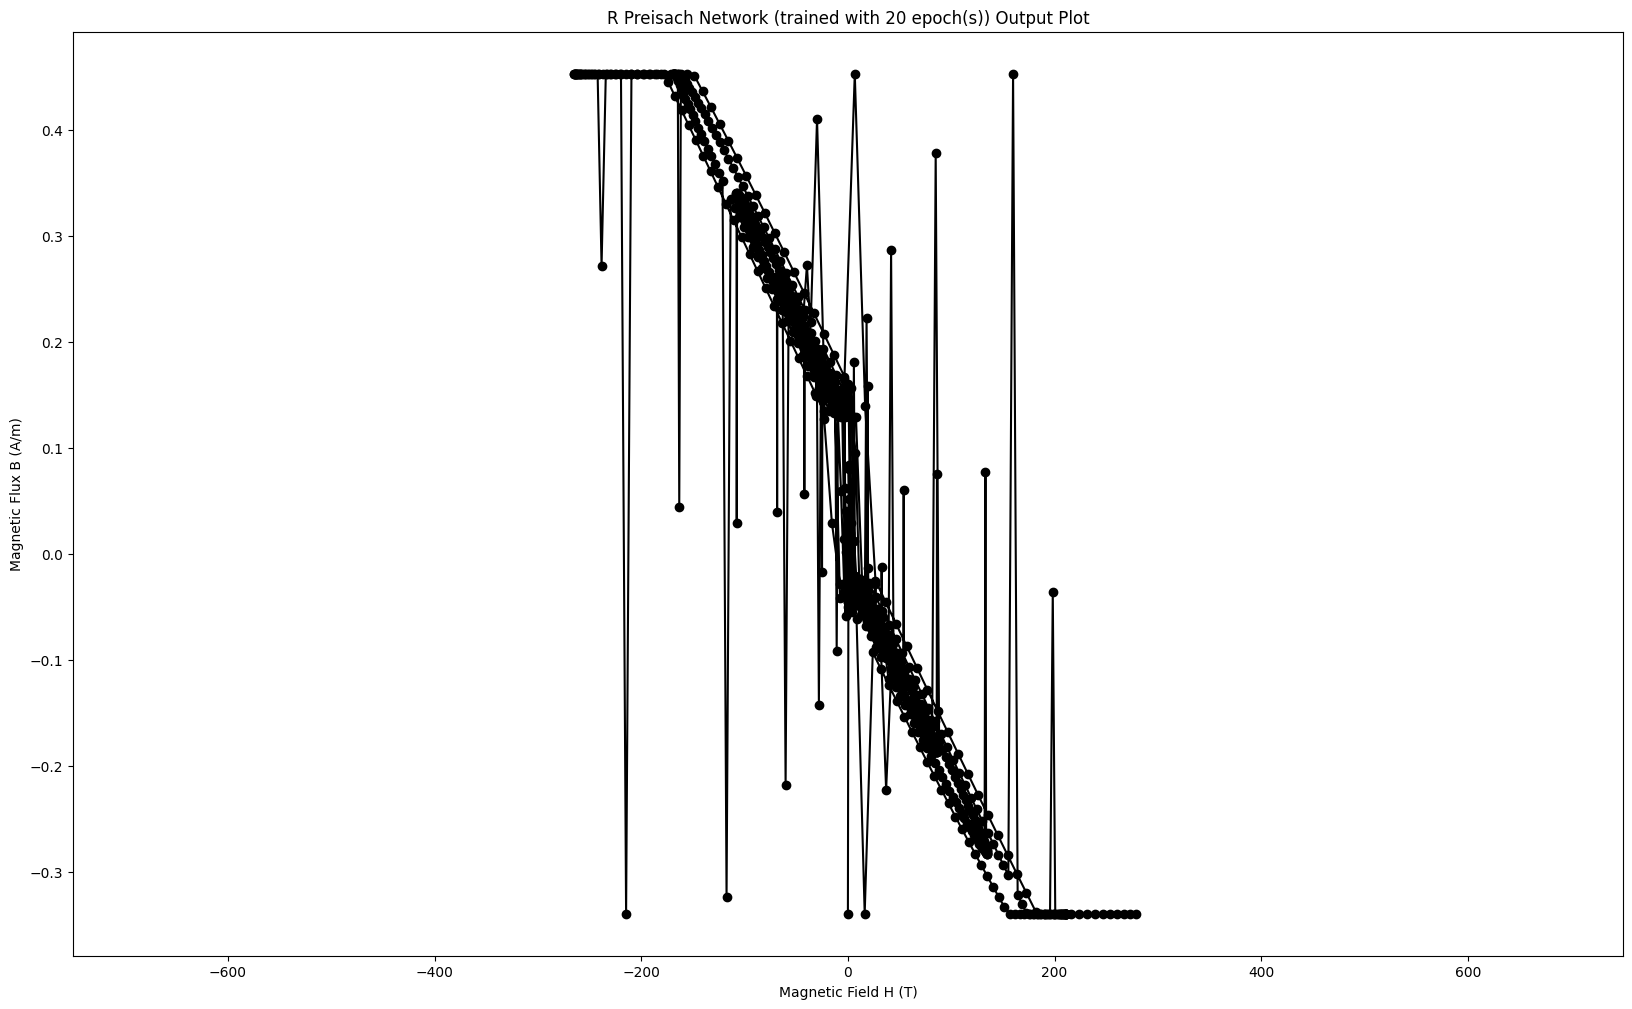

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 1)                   2         
                                                                 
 stop_operator_layer (Recurr  (32, 10)                 30        
 entPreisachLayer)                                               
                                                                 
 dense_1 (Dense)             (32, 10)                  110       
                                                                 
 dense_2 (Dense)             (32, 1)                   11        
                                                                 
Total params: 153
Trainable params: 133
Non-trainable params: 20
_________________________________________________________________


In [11]:
# Evaluate and generate a plot of the RPNN
print("Output range of predicted loop should be bound between (-2, 2). Max should be something around 1.8")
rpnn_prediction = rpnn_model.predict(p_test_x[0:1152])
plot_predicted(p_test_x[0:1152], rpnn_prediction[0:1152], "R Preisach Network (trained with {} epoch(s))".format(n))
rpnn_model.summary()

In [17]:
rpnn_model.layers[1].get_weights()

[array([[ 0.70677567,  0.504704  , -0.5321455 , -0.17853647,  0.37981543,
         -0.310695  ,  0.30932495, -0.29075837, -0.43772942, -0.00476266]],
       dtype=float32),
 array([ 1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1.], dtype=float32),
 array([-251.13956  , -179.33716  ,  189.08798  ,   63.43961  ,
        -134.96033  ,  110.39967  , -109.91286  ,  103.31557  ,
         155.53899  ,    1.6923211], dtype=float32)]

## Feedforward Network

In [9]:
# Generate and train feedforward network
feedforward_model = train_and_generate_feedforward_network(train_x, train_y, "feedforward.model", n_epochs=20)

Epoch 1/20
112/112 [==============================] - 10s 6ms/step - loss: 0.3670 - mean_squared_error: 0.3670
Epoch 2/20
112/112 [==============================] - 0s 3ms/step - loss: 0.0798 - mean_squared_error: 0.0798
Epoch 3/20
112/112 [==============================] - 0s 4ms/step - loss: 0.0461 - mean_squared_error: 0.0461
Epoch 4/20
112/112 [==============================] - 0s 4ms/step - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 5/20
112/112 [==============================] - 0s 3ms/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 6/20
112/112 [==============================] - 0s 4ms/step - loss: 0.0073 - mean_squared_error: 0.0073
Epoch 7/20
112/112 [==============================] - 0s 4ms/step - loss: 0.0047 - mean_squared_error: 0.0047
Epoch 8/20
112/112 [==============================] - 0s 4ms/step - loss: 0.0037 - mean_squared_error: 0.0037
Epoch 9/20
112/112 [==============================] - 1s 5ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 10/

In [10]:
# Load feedforward model
feedforward_model = tf.keras.models.load_model("./models/feedforward.model")

In [11]:
# Evaluate feedforward network
feedforward_prediction = feedforward_model.predict(test_x)
mse = compute_mse(test_y, feedforward_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
feedforward_model.evaluate(test_x, test_y)

38/38 [==============================] - 0s 3ms/step
MSE: 2.1225334018821713
38/38 [==============================] - 0s 4ms/step - loss: 0.0019 - mean_squared_error: 0.0019


[0.001932504354044795, 0.001932504354044795]

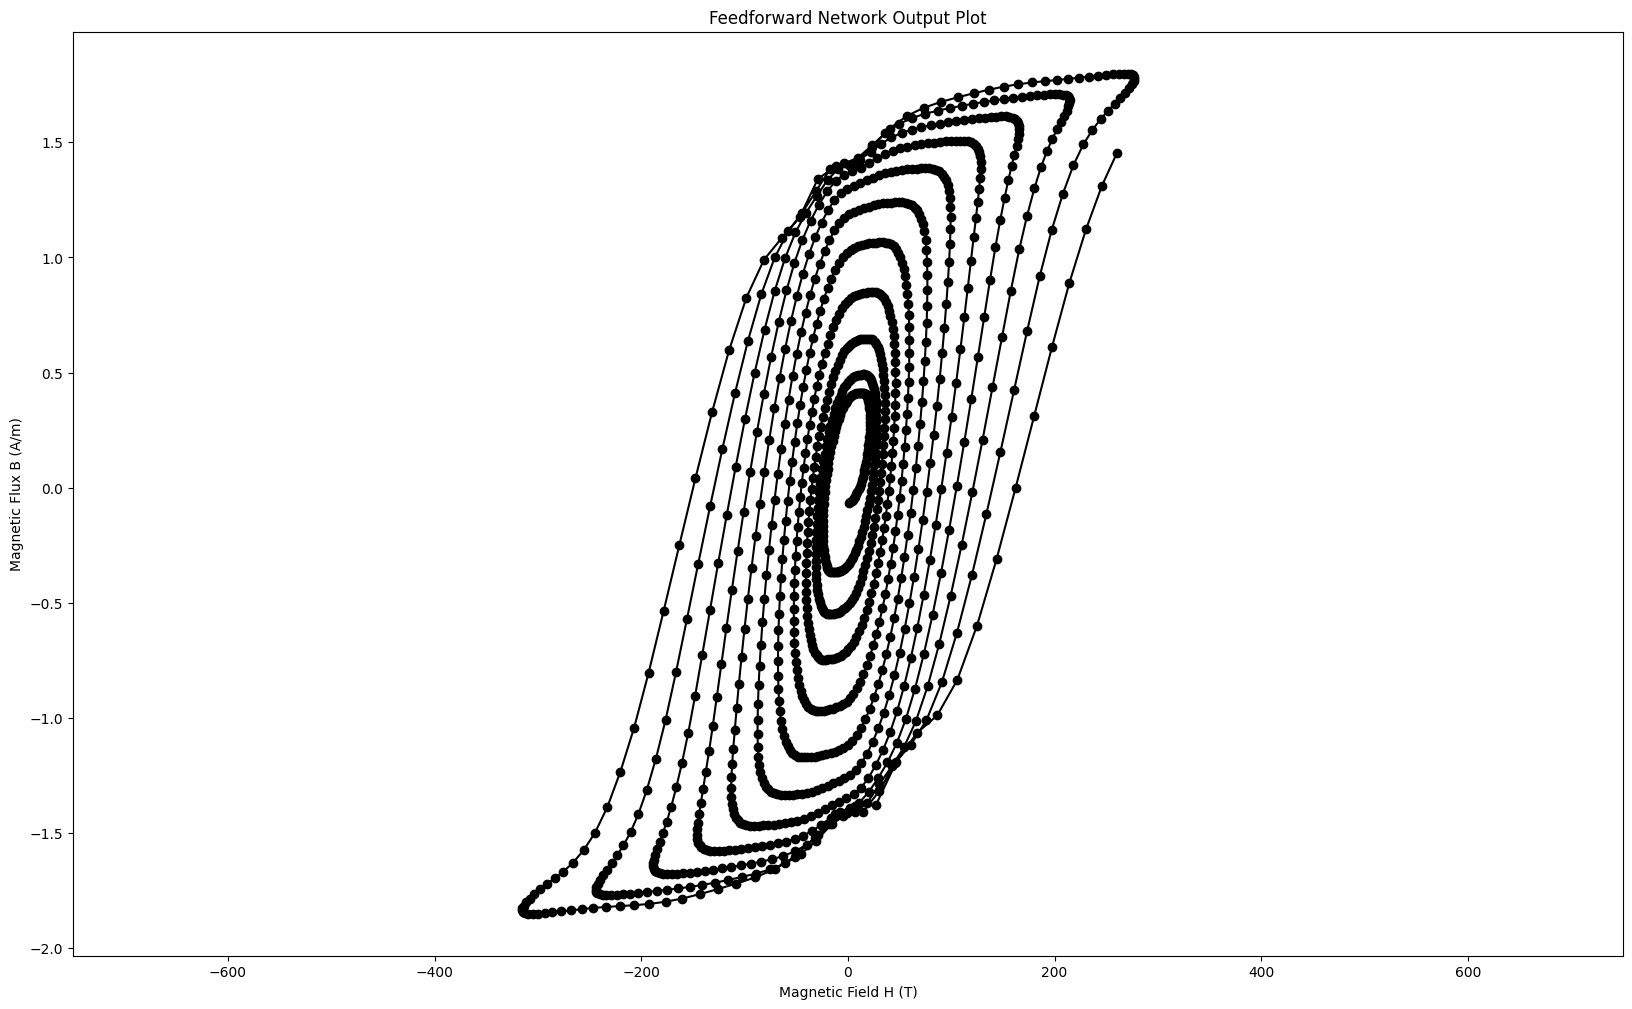

In [12]:
# Plot feedforward output
plot_predicted(test_next_h, feedforward_prediction, "Feedforward Network")

## Preisach Network

In [ ]:
# Generate and train preisach network
pnn_model = train_and_generate_preisach_network(p_train_x, p_train_y, "preisach.model", n_epochs=20)

In [ ]:
# Load preisach model
pnn_model = tf.keras.models.load_model("./models/preisach.model")

In [ ]:
#Evaluate preisach model
pnn_prediction = pnn_model.predict(p_test_x)
mse = compute_mse(p_test_y, pnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
pnn_model.evaluate(p_test_x, p_test_y)

In [ ]:
# Plot Preisach output
plot_predicted(p_test_x, pnn_prediction, "Preisach Network")

## Recurrent Network
no stop activation layer

In [ ]:
# Generate and train recurrent network (no stop operator)
rnn_model = train_and_generate_recurrent_network(train_x, train_y, "recurrent.model", n_epochs=20)

In [ ]:
# Load recurrent network
rnn_model = tf.keras.models.load_model("./models/recurrent.model")

In [ ]:
# Evaluate recurrent model
rnn_prediction = rnn_model.predict(test_x)
mse = compute_mse(test_y, rnn_prediction)
print("MSE: " + str(mse))

# tensorflow evaluation
rnn_model.evaluate(test_x, test_y)

In [ ]:
plot_predicted(test_next_h, rnn_prediction, "Recurrent LSTM network")